In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Raw Data Set Decoder/Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


Checking NO Duplicate value present in Request Id

> Indented block



In [ ]:
len(df["Request id"].unique())

6745

In [ ]:
df.shape

(6745, 6)

Checking For Null Values Present In Dataset

In [ ]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Percentage Of Null Values Present In dataset

In [ ]:
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


Converting Request Timestamp and Drop timestamp To Datetime	Format

In [ ]:
df["Request timestamp"]=df["Request timestamp"].astype(str)

In [ ]:
df["Request timestamp"]=df["Request timestamp"].replace("/","-")

In [ ]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)

In [ ]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)

Extract Hour From The Datetime

In [ ]:
df["req_hour"]=df["Request timestamp"].dt.hour

Extract Day From The Request timestamp

In [ ]:
df["req_day"]=df["Request timestamp"].dt.day

Making Plots For Analysis

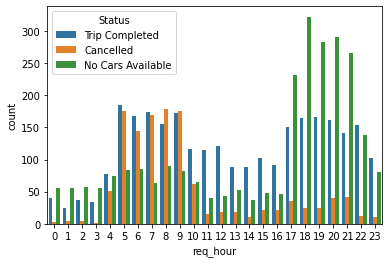

In [ ]:
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


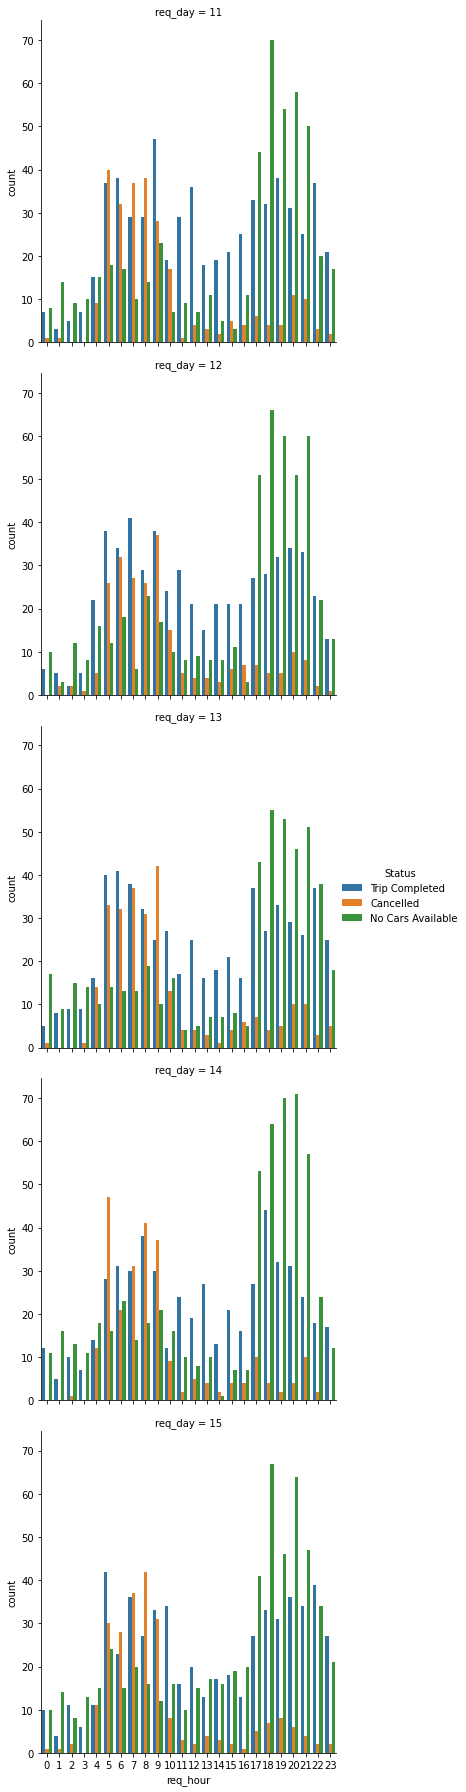

In [ ]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


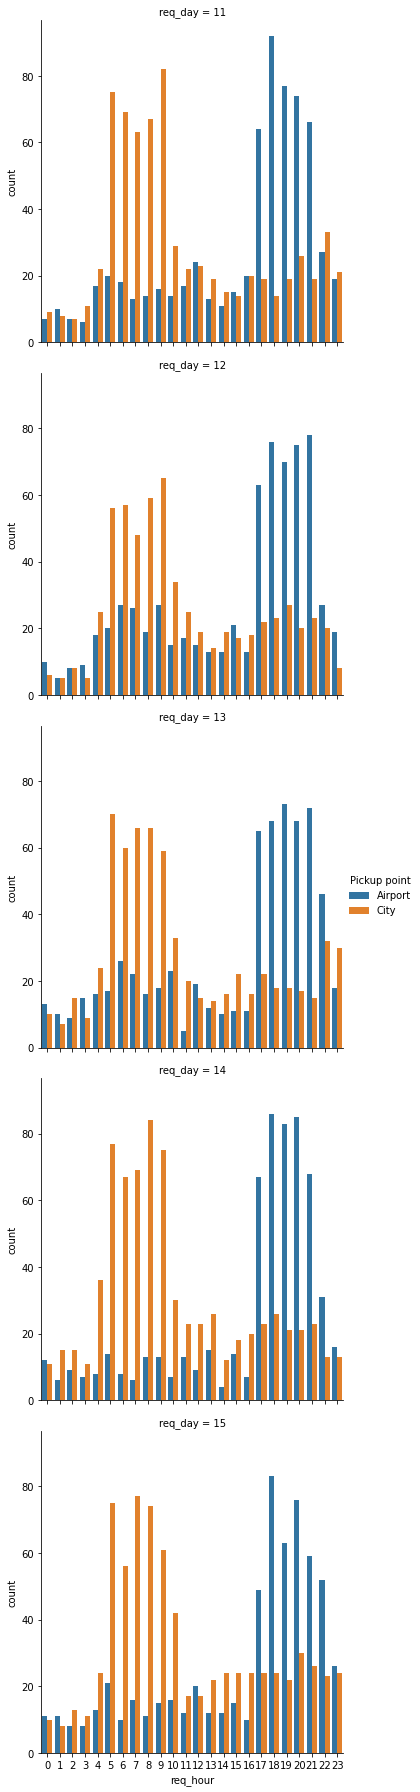

In [ ]:
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Pickup point",kind="count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


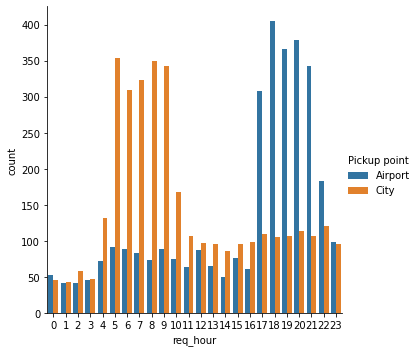

In [ ]:
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

MAking A New Column Name Time_Slot 

In [ ]:
df["Time_slot"]=0

Assigning Name Valus In Time_slot Column.

In [ ]:
j=0
for i in df["req_hour"]:
  if df.iloc[j,6]<5:
    df.iloc[j,8]="Pre_Morning"
  elif 5<=df.iloc[j,6]<10:
    df.iloc[j,8]="Morning_Rush"
  elif 10<=df.iloc[j,6]<17:
    df.iloc[j,8]="Day_Time"
  elif 17<=df.iloc[j,6]<22:
    df.iloc[j,8]="Evening_Rush"
  else:
    df.iloc[j,8]="late_Night"
  j=j+1

In [ ]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,late_Night


In [ ]:
df["Time_slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
late_Night       498
Name: Time_slot, dtype: int64

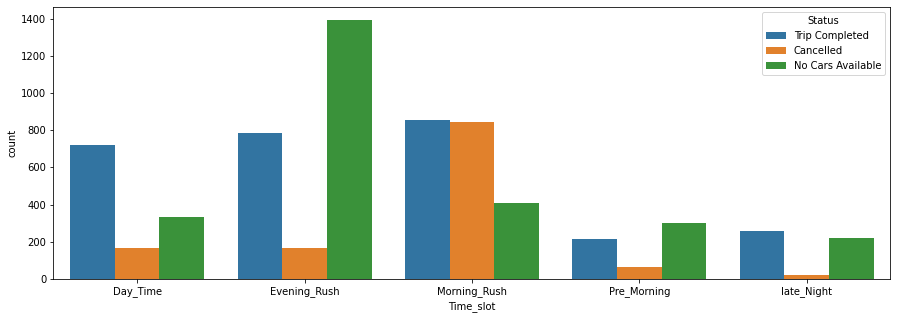

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x="Time_slot",hue="Status",data=df)
plt.show()

# **Making A New Dataset For Morning Rush**

In [ ]:
df_morning_rush=df[df["Time_slot"]=="Morning_Rush"]
df_morning_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


Ploting Morning rush

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


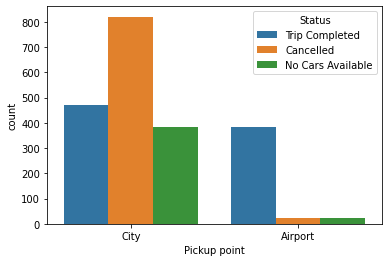

In [ ]:
sns.countplot("Pickup point",hue="Status",data=df_morning_rush)
plt.show()

**Severity Of Problem By Location And Their Count( CAncelation Of Cab As Per The Pickup Location At Morning Rush Hours)**

Tally And Calculating No Of Cancelation In Airport Area

In [ ]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]

In [ ]:
df_airport_cancelled.shape[0]

23

Tally And Calculating No Of Cancelation In City Area

In [ ]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]

In [ ]:
df_city_cancelled.shape[0]

820

# **Supply And Demand Analysis**

### **Analysis In Morning rush in City Area**

Demand In Morning Rush in City Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

Supply in Morning Rush In City Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

Number Of Trip Got Cancelled In City Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

Number Of Trip cancelled Due To No Car Available

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

### **Analysis In Morning rush in Airport Area**

Demand In Morning Rush in Airport Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

Supply in Morning Rush In Airport Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

No Of Cars Got Cancelled In Airport Area

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

Number Of Trip cancelled Due To No Car Available

In [ ]:
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

# **Making A New Dataset For Evening Rush**

In [ ]:
df_evening_rush=df[df["Time_slot"]=="Evening_Rush"]
df_evening_rush

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21,13,Evening_Rush
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17,15,Evening_Rush
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17,13,Evening_Rush
...,...,...,...,...,...,...,...,...,...
6685,6625,Airport,NaN,No Cars Available,2016-07-15 21:52:53,NaT,21,15,Evening_Rush
6686,6629,Airport,NaN,No Cars Available,2016-07-15 21:53:37,NaT,21,15,Evening_Rush
6687,6628,Airport,NaN,No Cars Available,2016-07-15 21:54:21,NaT,21,15,Evening_Rush
6688,6624,Airport,NaN,No Cars Available,2016-07-15 21:56:00,NaT,21,15,Evening_Rush


In [ ]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

60

Ploting Evening Rush

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


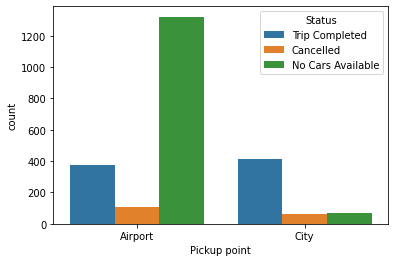

In [ ]:
sns.countplot("Pickup point",hue="Status",data=df_evening_rush)
plt.show()

Tally And Calculating No Of Cancelation In Airport Area

In [ ]:
df_airport_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

106

Tally And Calculating No Of Cancelation In City Area

In [ ]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

60

## **Analysis In Evening rush in City Area**

Demand In Evening Rush in City Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

Supply In Evening rush In City Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

411

Number Of Cancellation In City Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

Number Of CAncellation Due To No Cars Available In City Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

### **Analysis In Evening Rush In Airport Area**

Demand In Evening Rush In Airport Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

Supply in Evening rush In Airport Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

Number Of Cancellation In Airport Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

Number Of CAncellation Due To No Cars Available In Airport Area

In [ ]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

# **Making Another Dataset**

In [ ]:
df_morning_city=df.loc[(df["Pickup point"]=="City") & (df["Time_slot"]=="Morning_Rush")]
df_morning_city

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush
13,3075,City,2.0,Trip Completed,2016-07-13 08:02:53,2016-07-13 09:16:19,8,13,Morning_Rush
30,1826,City,4.0,Trip Completed,2016-07-12 09:27:00,2016-07-12 10:27:00,9,12,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6307,5863,City,NaN,No Cars Available,2016-07-15 09:15:16,NaT,9,15,Morning_Rush
6308,5882,City,NaN,No Cars Available,2016-07-15 09:32:02,NaT,9,15,Morning_Rush
6309,5885,City,NaN,No Cars Available,2016-07-15 09:34:14,NaT,9,15,Morning_Rush
6310,5881,City,NaN,No Cars Available,2016-07-15 09:36:17,NaT,9,15,Morning_Rush


Converting To New Data Frame

In [ ]:
df_morning_city_count=pd.DataFrame(df_morning_city["Status"].value_counts())
df_morning_city_count 

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [ ]:
df_morning_city_count["Status"].values

array([820, 472, 385])

In [ ]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

# **Making Pie Chart**

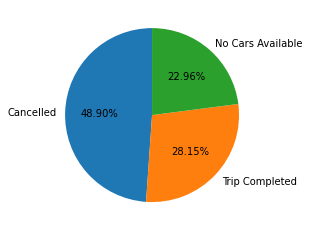

In [ ]:
fig,ax=plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

# **Making Another Dataset**

In [ ]:
df_evening_city=df.loc[(df["Pickup point"]=="Airport") & (df["Time_slot"]=="Evening_Rush")]

Creating new Data Frame

In [ ]:
df_evening_airport_count=pd.DataFrame(df_evening_city["Status"].value_counts())
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [ ]:
df_evening_airport_count["Status"].values

array([1321,  373,  106])

In [ ]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

# **Making Pie Chart**

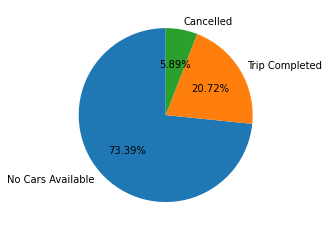

In [ ]:
fig,ax=plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,autopct="%.2f%%",startangle=90)
plt.show()

# **INFERENCES**

1.   They Should Give Some Bonus For Each Trip They Complete From The City To The Airport In The Morning Rush. This Will Ensure That Less Number Of Trip Are Cancelled
2.   Uber Can Pay For Gas milage For driver To come Back To The City Without A ride.
3.   Drivers Can Agin BE Given Bonus To Complete A trip From The Airport In The Evening.This Will Ensure The Supply Incereases At The Airport.
4.   Uber Can Also Pay drivers to Come Without Passenger To The Airport
5.   Another Way Coul Be To Incerase Licenses Of Car Pooling Taxis So That Lesser Number Of Cars Can Serve More Pessangers.